### Data Acquisition

In [18]:
# all modules
import pandas as pd
from sqlalchemy import create_engine
import missingno

In [11]:
#load dataset

sqlitedb_path = '/home/usuario/Documentos/Ironhack/Project_1_0420_JuanMunoz/data/raw/raw_data_project_m1.db'
engine = create_engine(f'sqlite:///{sqlitedb_path}')

query_all = """SELECT * FROM career_info cif  
inner join poll_info pif on cif.uuid = pif.uuid  
inner join country_info ci on ci.uuid = pif.uuid 
inner join personal_info pi on pi.uuid = ci.uuid"""

df_all_raw_data = pd.read_sql_query(query_all, engine)
df_all_raw_data.head()

,uuid,dem_education_level,dem_full_time_job,normalized_job_code,uuid,question_bbi_2016wave4_basicincome_awareness,question_bbi_2016wave4_basicincome_vote,question_bbi_2016wave4_basicincome_effect,question_bbi_2016wave4_basicincome_argumentsfor,question_bbi_2016wave4_basicincome_argumentsagainst,uuid,country_code,rural,uuid,age,gender,dem_has_children,age_group
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,no,no,None,f6e7ee00-deac-0133-4de8-0a81e8b09a82,I know something about it,I would not vote,None of the above,None of the above,None of the above,f6e7ee00-deac-0133-4de8-0a81e8b09a82,AT,countryside,f6e7ee00-deac-0133-4de8-0a81e8b09a82,61 years old,male,NO,40_65
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,high,yes,861a9b9151e11362eb3c77ca914172d0,54f0f1c0-dda1-0133-a559-0a81e8b09a82,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working,54f0f1c0-dda1-0133-a559-0a81e8b09a82,AT,urban,54f0f1c0-dda1-0133-a559-0a81e8b09a82,57 years old,male,yES,40_65
2,83127080-da3d-0133-c74f-0a81e8b09a82,None,no,None,83127080-da3d-0133-c74f-0a81e8b09a82,I have heard just a little about it,I would not vote,‰Û_ gain additional skills,It creates more equality of opportunity,Foreigners might come to my country and take a...,83127080-da3d-0133-c74f-0a81e8b09a82,AT,city,83127080-da3d-0133-c74f-0a81e8b09a82,32 years old,male,nO,26_39
3,15626d40-db13-0133-ea5c-0a81e8b09a82,high,yes,049a3f3a2b5f85cb2971ba77ad66e10c,15626d40-db13-0133-ea5c-0a81e8b09a82,I have heard just a little about it,I would probably vote for it,‰Û_ work less,It reduces anxiety about financing basic needs,None of the above,15626d40-db13-0133-ea5c-0a81e8b09a82,AT,Country,15626d40-db13-0133-ea5c-0a81e8b09a82,45 years old,Male,YES,40_65
4,24954a70-db98-0133-4a64-0a81e8b09a82,high,yes,f4b2fb1aa40f661488e2782b6d57ad2f,24954a70-db98-0133-4a64-0a81e8b09a82,I have heard just a little about it,I would probably vote for it,None of the above,It reduces anxiety about financing basic needs,It is impossible to finance | It might encoura...,24954a70-db98-0133-4a64-0a81e8b09a82,AT,city,24954a70-db98-0133-4a64-0a81e8b09a82,41 years old,Fem,yES,40_65


DATAFRAME SHAPE 
 - rows: 9649 
 - columns: 18 

DATAFRAME NULLS COUNT: 
uuid                                                      0
dem_education_level                                     663
dem_full_time_job                                         0
normalized_job_code                                    3947
uuid                                                      0
question_bbi_2016wave4_basicincome_awareness              0
question_bbi_2016wave4_basicincome_vote                   0
question_bbi_2016wave4_basicincome_effect                 0
question_bbi_2016wave4_basicincome_argumentsfor           0
question_bbi_2016wave4_basicincome_argumentsagainst       0
uuid                                                      0
country_code                                              0
rural                                                     0
uuid                                                      0
age                                                       0
gender                     

uuid                                                    0.000000
dem_education_level                                     6.871178
dem_full_time_job                                       0.000000
normalized_job_code                                    40.905793
uuid                                                    0.000000
question_bbi_2016wave4_basicincome_awareness            0.000000
question_bbi_2016wave4_basicincome_vote                 0.000000
question_bbi_2016wave4_basicincome_effect               0.000000
question_bbi_2016wave4_basicincome_argumentsfor         0.000000
question_bbi_2016wave4_basicincome_argumentsagainst     0.000000
uuid                                                    0.000000
country_code                                            0.000000
rural                                                   0.000000
uuid                                                    0.000000
age                                                     0.000000
gender                   

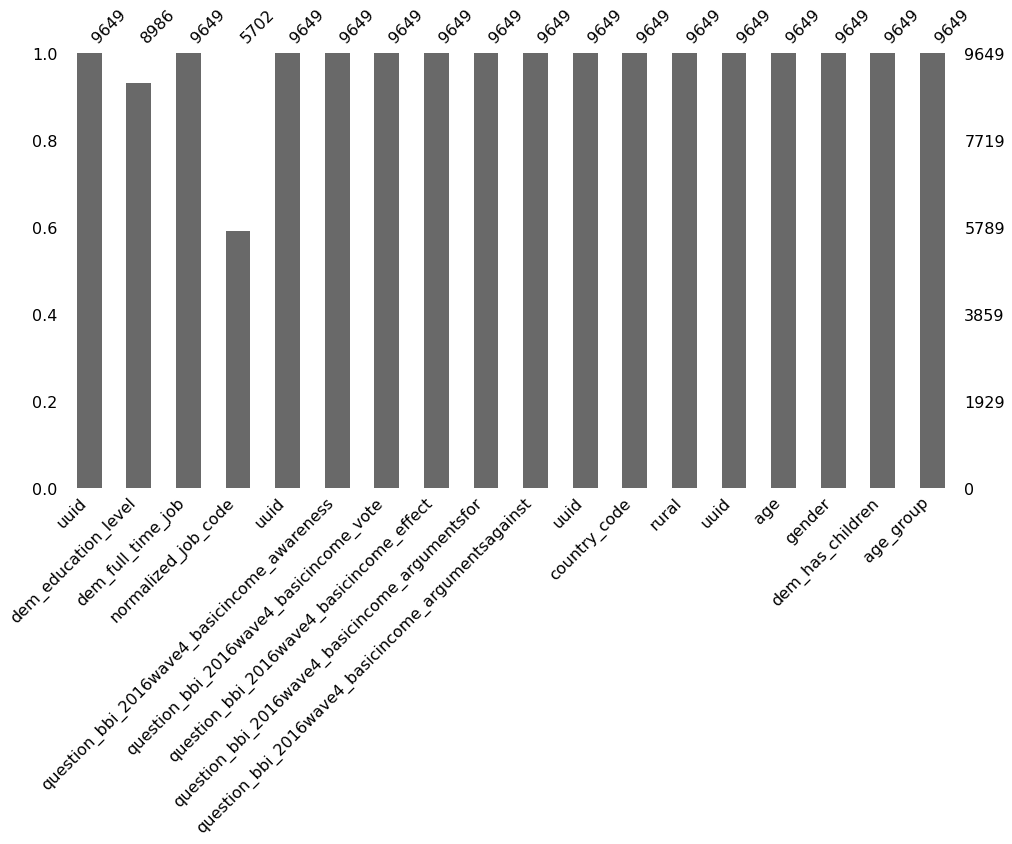

In [16]:
# basic exploration

print('DATAFRAME SHAPE \n - rows: {} \n - columns: {}'.format(df_all_raw_data.shape[0],df_all_raw_data.shape[1]),'\n')
print('DATAFRAME NULLS COUNT: \n{}'.format(df_all_raw_data.isnull().sum()),'\n')
print('DATAFRAME COLUMNS TYPE: \n{}'.format(df_all_raw_data.dtypes,'\n'))

# Value % of null data original
print('DATAFRAME ALL DATA')
display(df_all_raw_data.isnull().sum() / len(df_all_raw_data) *100)
missingno.bar(df_all_raw_data, figsize=(16, 8))

In [17]:
#Export the detail analysis result to a CSV
path_to= '/home/usuario/Documentos/Ironhack/Project_1_0420_JuanMunoz/data/processed'
df_all_raw_data.to_csv(f'{path_to}/raw_data_project_all.csv',index = False, header=True, sep = ';')


In [ ]:
#Watch out with the column normalized_job_code and dem_education_level